Stages Analysis: 

Questions to answers:

1 - Where in the funnel do users drop off?

2 - How fast do users progress between stages?
    - Speed (or hesitation) helps prioritize nudges: quick-acting shoppers vs. deliberators.
    
3 - 	How do engagement ratios relate to revenue/value?
    - Shows whether “busy” users (many clicks/sessions) actually spend more.

Average Views per User     : 4.39
Average Carts per User     : 0.89
Average Purchases per User : 0.68

Cart-to-View Conversion     : 20.36%
Purchase-to-Cart Conversion : 76.53%
Purchase-to-View Conversion : 15.58%


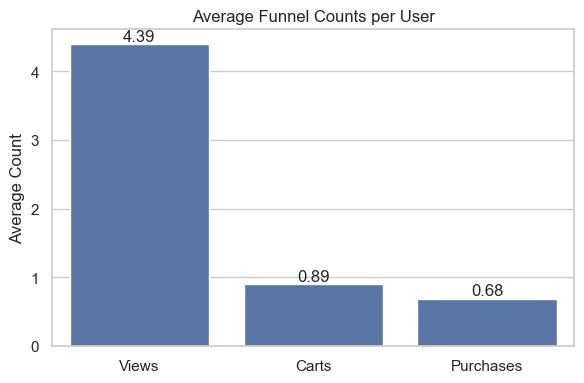

In [ ]:
# Load 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

core = pd.read_csv(r'C:\Users\luket\projects\traditonal\ecom_core.csv')


# Compute stage means & conversion rates
avg_views      = core['view_count_mean'].mean()
avg_carts      = core['cart_count_mean'].mean()
avg_purchases  = core['purchase_count_mean'].mean()

cart_rate      = avg_carts / avg_views          # cart ÷ view
purchase_rate  = avg_purchases / avg_carts      # purchase ÷ cart
overall_rate   = avg_purchases / avg_views      # purchase ÷ view

print(f"Average Views per User     : {avg_views:,.2f}")
print(f"Average Carts per User     : {avg_carts:,.2f}")
print(f"Average Purchases per User : {avg_purchases:,.2f}\n")

print(f"Cart-to-View Conversion     : {cart_rate:.2%}")
print(f"Purchase-to-Cart Conversion : {purchase_rate:.2%}")
print(f"Purchase-to-View Conversion : {overall_rate:.2%}")

# Funnel bar chart
stages  = ['Views', 'Carts', 'Purchases']
values  = [avg_views, avg_carts, avg_purchases]

plt.figure(figsize=(6, 4))
sns.barplot(x=stages, y=values)
plt.title("Average Funnel Counts per User")
plt.ylabel("Average Count")
for i,v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


### Question 1 – Where Do Users Drop Off in the Funnel?

| Stage     | Average per User | Stage-to-Stage Conversion |
|-----------|------------------|---------------------------|
| **Views** | **4.39**         | – |
| **Carts** | **0.89**         | **Cart ÷ View = 20.3 %** |
| **Purchases** | **0.68**     | **Purchase ÷ Cart = 76.5 %**<br>**Purchase ÷ View** = **15.6 %** |

**Key insights**

* **Biggest leak = View → Cart.** Roughly 80 % of product views never make it to the cart stage.  
* **Checkout flow is relatively healthy.** Once an item is in the cart, more than three-quarters of users complete the purchase.  
* **Optimisation priority:**  
  * Strengthen add-to-cart triggers (e.g., clearer CTAs, limited-time offers, social proof).  

The chart confirms a classic funnel shape in traditional ecommerce: high interest at the top, steep drop entering the cart, and a comparatively smooth path from cart to purchase.


,count,mean,std,min,10%,25%,50%,75%,90%,max
time_to_view_mean,112583.0,413.60,1761.01,0.00,0.47,0.60,0.84,1.47,559.10,49435.76
time_to_cart_mean,112583.0,1024.53,3729.09,0.03,1.36,1.96,3.28,8.21,3277.29,98584.61
time_to_purchase_mean,112583.0,1430.47,5624.51,0.17,1.60,2.29,3.69,7.72,2205.85,197169.22


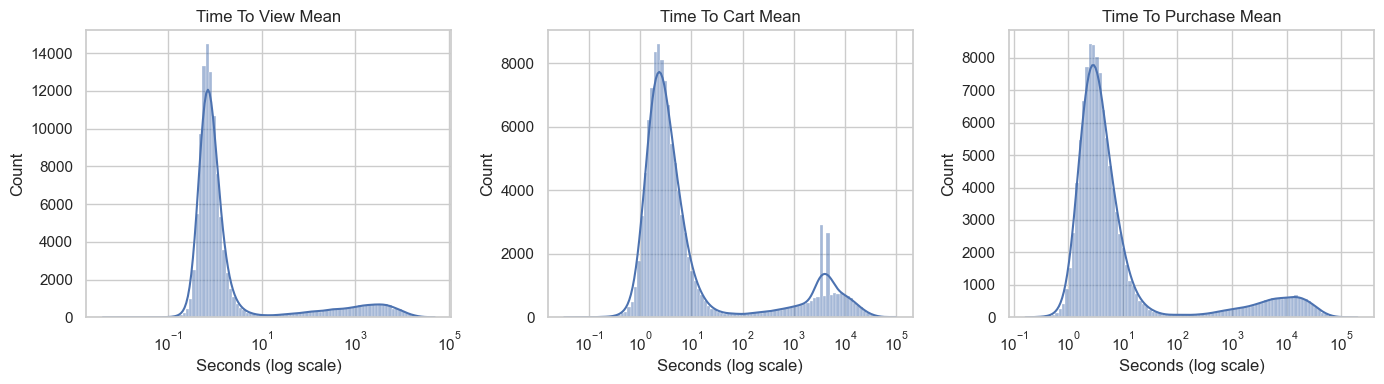

In [ ]:
import numpy as np

time_cols = ['time_to_view_mean',
             'time_to_cart_mean',
             'time_to_purchase_mean']

# Descriptive stats & quartiles
time_stats = core[time_cols].describe(percentiles=[0.1,0.25,0.5,0.75,0.9]).T
time_stats[['mean','std','min','10%','25%','50%','75%','90%','max']] = \
    time_stats[['mean','std','min','10%','25%','50%','75%','90%','max']].round(2)
display(time_stats)

# Histograms (log-x)
fig, axes = plt.subplots(1, 3, figsize=(14,4))
for ax, col in zip(axes.ravel(), time_cols):
    sns.histplot(core[col], bins=100, ax=ax, log_scale=True, kde=True)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('Seconds (log scale)')
plt.tight_layout()
plt.show()

# Flag quick vs slow cohorts
for col in time_cols:
    q1 = core[col].quantile(0.25)
    q4 = core[col].quantile(0.75)
    cohort_label = f"{col.split('_')[2]}_speed_cohort"
    # 0 = mid, 1 = quick (Q1), 2 = slow (Q4)
    core[cohort_label] = np.select(
        [core[col] <= q1,
         core[col] >= q4],
        [1, 2], default=0
    )



### Question 2 – How Fast Do Users Move Through the Funnel?

| Metric | 10th % (Very Fast) | **Q1** (Fast) | **Median** | **Q3** (Slow) | 90th % (Very Slow) | Max |
|--------|-------------------|---------------|------------|---------------|--------------------|------|
| Time to View | 0.47 s | **0.60 s** | **0.84 s** | **1.47 s** | 559 s | 49 ,436 s |
| Time to Cart | 1.36 s | **1.96 s** | **3.28 s** | **8.21 s** | 3,277 s | 98 ,585 s |
| Time to Purchase | 2.29 s | **2.29 s** | **3.69 s** | **7.72 s** | 2,206 s | 197 ,169 s |

#### Distribution Highlights
* **Super-fast core:** 75 % of ecommerce customers add to cart within **∼8 s** and complete purchase within **∼8 s** of carting.  
* **Long right tails:** A small cohort deliberates for minutes or hours (up to several days).  
* **Two-speed pattern:** The kernel density shows a tight peak at a few seconds plus a flatter secondary hump (slow shoppers).

#### Insight
> The majority of shoppers are **decisive buyers** who move from first view to purchase in under 10 seconds.  
> **Slow-moving Q4 cohort (<25 %)** represents potential **reminder-nudge** or **remarketing** opportunity — for example, timed emails or in-session prompts to re-engage users who linger.


,target_customer_value,target_revenue
session_count_ratio,0.099,0.072
click_count_ratio,0.114,0.071
transaction_count_ratio,0.172,0.090


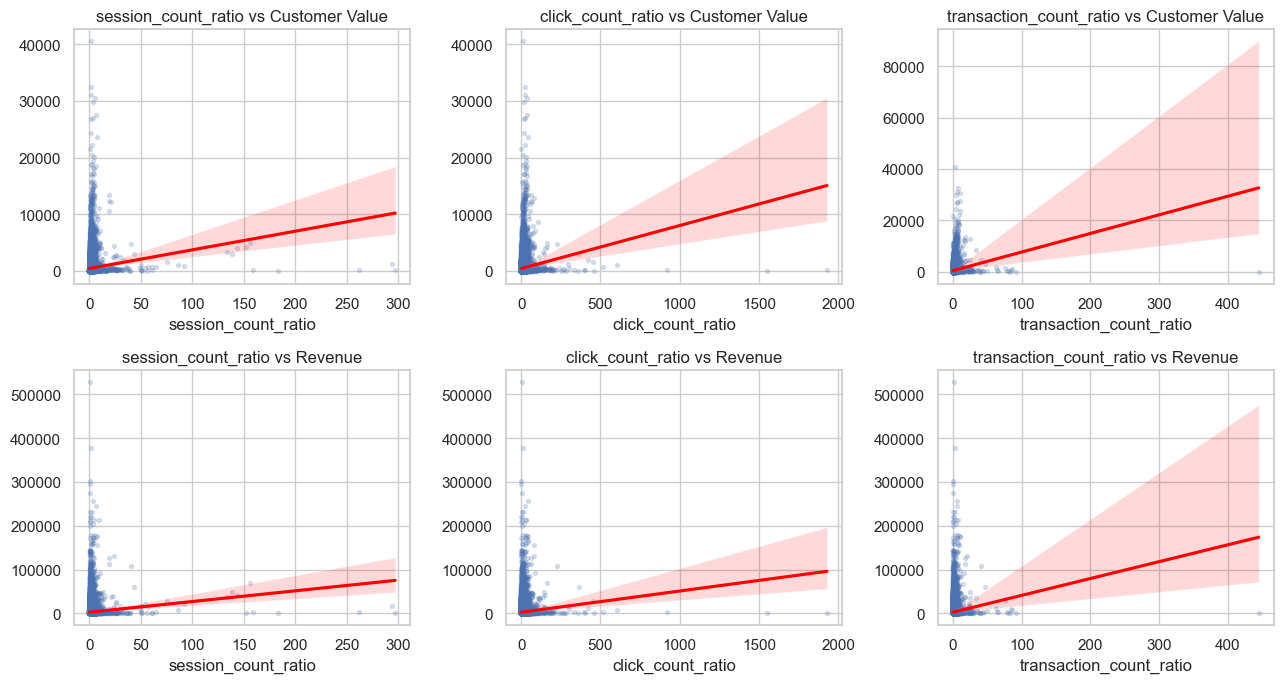

In [ ]:
# Correlation matrix
ratio_cols   = ['session_count_ratio', 'click_count_ratio', 'transaction_count_ratio']
target_cols  = ['target_customer_value', 'target_revenue']

corr_df = core[ratio_cols + target_cols].corr().loc[ratio_cols, target_cols]
corr_df = corr_df.round(3)
display(corr_df)

# Scatterplots with trend lines

fig, axes = plt.subplots(2, 3, figsize=(13, 7))
for i, ratio in enumerate(ratio_cols):
    sns.regplot(data=core, x=ratio, y='target_customer_value',
                scatter_kws={'s':8, 'alpha':0.2}, ax=axes[0,i], line_kws={'color':'red'})
    axes[0,i].set_title(f"{ratio} vs Customer Value")
    axes[0,i].set_ylabel("")

    sns.regplot(data=core, x=ratio, y='target_revenue',
                scatter_kws={'s':8, 'alpha':0.2}, ax=axes[1,i], line_kws={'color':'red'})
    axes[1,i].set_title(f"{ratio} vs Revenue")
    axes[1,i].set_ylabel("")

plt.tight_layout()
plt.show()


### Question 3 – Do Engagement Ratios Relate to Customer Value?

| Engagement Ratio → Target | ρ(Customer Value) | ρ(Revenue) |
|---------------------------|-------------------|------------|
| **Session Count Ratio**      | **0.10** | 0.07 |
| **Click Count Ratio**        | 0.11 | 0.07 |
| **Transaction Count Ratio**  | **0.17** | **0.09** |

*(ρ = Pearson correlation ; values rounded to two decimals)*

#### Key observations
1. **Positive but weak relationships**  
   * More sessions and clicks in the current period do align with higher spend, yet the effect is modest (ρ ≈ 0.1).  
   * The strongest ― though still moderate ― signal is **Transaction Count Ratio** (ρ ≈ 0.17 for customer-value, 0.09 for revenue).

2. **Wide dispersion**  
   * Scatterplots show a dense cluster of low spenders even at high ratio values.  
   * A minority of users combine surging ratios **and** high spend – the “true power buyers.”

3. **Busy ≠ Valuable (always)**  
   * Heavy browsing or clicking alone does not guarantee high revenue.  
   * Recent purchase bursts (high transaction ratio) are the most reliable engagement cue.

#### Practical takeaway
* Use **Transaction Count Ratio** as a **“hot lead” indicator** in marketing automation.  
* Combine ratio surges with funnel context (e.g., cart activity) to separate genuine buyers from mere browsers.  
